In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime

from imblearn.over_sampling import SMOTE
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [2]:
df_main = pd.read_csv('C:/Documents/Post Graduate Study/Higher Diploma DA/final project/datasets/final ds/covid19/temperature_data.csv')

# Main dataset inspection

In [3]:
df_main.info()
print(df_main.describe())
print(df_main.isnull().sum())
df_main.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20288 entries, 0 to 20287
Data columns (total 13 columns):
Date                20288 non-null object
State               8625 non-null object
Country             20288 non-null object
Cumulative_cases    20288 non-null int64
Cumulative_death    20288 non-null int64
Daily_cases         20288 non-null int64
Daily_death         20288 non-null int64
Latitude            20288 non-null float64
Longitude           20288 non-null float64
Temperature         20288 non-null float64
Wind_speed          20288 non-null float64
Precipitation       20288 non-null float64
Fog_Presence        20288 non-null int64
dtypes: float64(5), int64(5), object(3)
memory usage: 2.0+ MB
       Cumulative_cases  Cumulative_death   Daily_cases   Daily_death  \
count      20288.000000      20288.000000  20288.000000  20288.000000   
mean         480.127957         19.309690     38.524399      1.853066   
std         4338.666702        266.421017    344.483546     26.56

Date                False
State                True
Country             False
Cumulative_cases    False
Cumulative_death    False
Daily_cases         False
Daily_death         False
Latitude            False
Longitude           False
Temperature         False
Wind_speed          False
Precipitation       False
Fog_Presence        False
dtype: bool

In [4]:
df_main

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.000000,65.000000,5.89,9.4,0.00,0
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.000000,65.000000,5.56,14.9,0.00,1
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.000000,65.000000,4.50,10.4,0.17,1
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.000000,65.000000,7.78,6.1,0.57,1
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.000000,65.000000,6.00,10.8,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20283,26-03-2020,NaN,Zimbabwe,3,1,0,0,-17.829167,31.052222,23.61,3.6,0.00,0
20284,27-03-2020,NaN,Zimbabwe,5,1,2,0,-17.829167,31.052222,20.28,2.1,0.00,1
20285,28-03-2020,NaN,Zimbabwe,7,1,2,0,-17.829167,31.052222,20.39,5.4,0.00,0
20286,29-03-2020,NaN,Zimbabwe,7,1,0,0,-17.829167,31.052222,19.44,3.9,0.00,0


In [5]:
#function to convert date to week day
def ConvertDateToDay(x):
    return datetime.datetime.strptime(x, '%d-%m-%Y').strftime('%A')

## Convert date into weekdays

In [6]:
df_main['Date'] = df_main['Date'].apply(ConvertDateToDay)

In [7]:
#Filter out those rows from dataframe which contains no record reported on particular day
df_main = df_main.loc[df_main['Daily_cases'] != 0]
df_main

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
33,Monday,NaN,Afghanistan,1,0,1,0,33.000000,65.000000,4.44,4.0,0.47,1
46,Sunday,NaN,Afghanistan,4,0,3,0,33.000000,65.000000,-1.89,3.6,0.00,1
48,Tuesday,NaN,Afghanistan,5,0,1,0,33.000000,65.000000,-1.72,5.3,0.12,1
49,Wednesday,NaN,Afghanistan,7,0,2,0,33.000000,65.000000,-2.94,3.9,0.00,1
52,Saturday,NaN,Afghanistan,11,0,4,0,33.000000,65.000000,2.44,5.3,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20218,Monday,NaN,Zambia,35,0,6,0,-15.416700,28.283300,29.28,7.0,0.00,0
20277,Friday,NaN,Zimbabwe,1,0,1,0,-17.829167,31.052222,20.22,5.5,0.00,1
20278,Saturday,NaN,Zimbabwe,3,0,2,0,-17.829167,31.052222,20.39,5.4,0.00,1
20284,Friday,NaN,Zimbabwe,5,1,2,0,-17.829167,31.052222,20.28,2.1,0.00,1


In [8]:
#Count how many total cases reported on each day of week
mon_cases = df_main[df_main['Date'] == 'Monday']
tue_cases = df_main[df_main['Date'] == 'Tuesday']
wed_cases = df_main[df_main['Date'] == 'Wednesday']
thu_cases = df_main[df_main['Date'] == 'Thursday']
fri_cases = df_main[df_main['Date'] == 'Friday']
sat_cases = df_main[df_main['Date'] == 'Saturday']
sun_cases = df_main[df_main['Date'] == 'Sunday']


days_cases = [('Monday', mon_cases['Daily_cases'].sum(), mon_cases['Daily_death'].sum()),
                    ('Tuesday', tue_cases['Daily_cases'].sum(), tue_cases['Daily_death'].sum()),
                    ('Wednesday', wed_cases['Daily_cases'].sum(), wed_cases['Daily_death'].sum()),
                    ('Thursday', thu_cases['Daily_cases'].sum(), thu_cases['Daily_death'].sum()),
                    ('Friday', fri_cases['Daily_cases'].sum(), fri_cases['Daily_death'].sum()),
                    ('Saturday', sat_cases['Daily_cases'].sum(), sat_cases['Daily_death'].sum()),
                    ('Sunday', sun_cases['Daily_cases'].sum(), sun_cases['Daily_death'].sum())]
days_cases = pd.DataFrame(days_cases,
                  columns=['Day', 'Daily_cases', 'Daily_death'])
print(days_cases)

         Day  Daily_cases  Daily_death
0     Monday       131710         6899
1    Tuesday        75027         3700
2  Wednesday        83165         4070
3   Thursday       117071         4627
4     Friday       127994         5781
5   Saturday       125585         6188
6     Sunday       121031         6185


## Visualization of total cases and death on each day of week

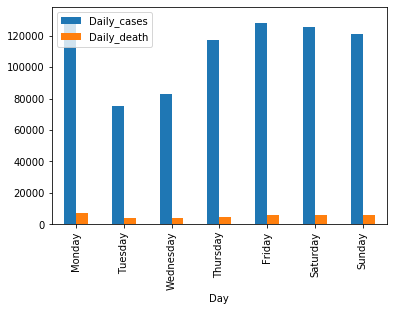

In [9]:
days_cases.plot(x="Day", y=["Daily_cases","Daily_death"], kind="bar")
plt.show()

## Visualization of total number of rows of each day of week

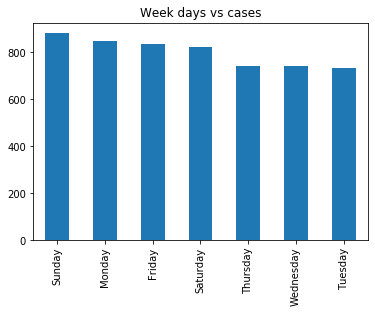

In [10]:
df_main['Date'].value_counts().plot.bar()
plt.title("Week days vs cases")
plt.show()

In [11]:
# Dropping the first column from status dataset
#days = pd.get_dummies(df_main['Date'], drop_first = True)

# Adding the status to the original housing dataframe
#df_main = pd.concat([df_main, days], axis = 1)

# Dropping 'furnishingstatus' as we have created the dummies for it
#df_main.drop(['Date'], axis = 1, inplace = True)

#df_main

## Visualization of corelation of each continuous variable with other continuous variable when target variable is daily cases

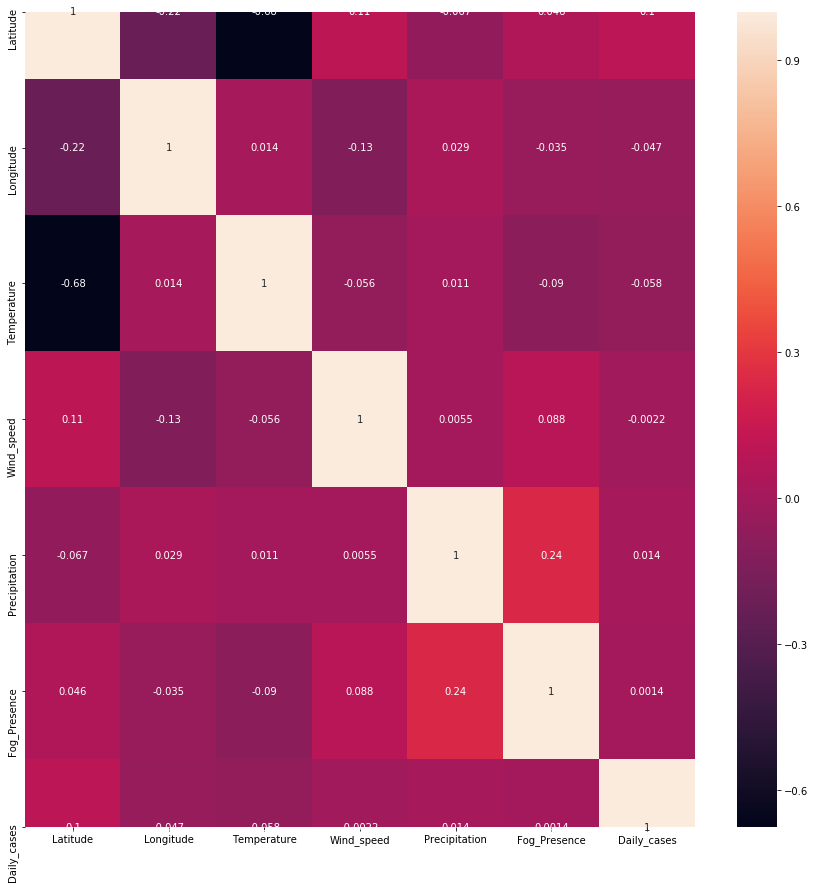

In [12]:
plt.figure(figsize=(15,15))
columns =['Date','Latitude','Longitude','Temperature','Wind_speed','Precipitation','Fog_Presence','Daily_cases']
sns.heatmap(df_main[columns].corr(),annot=True)

#### "Latitude" is directly propotional to daily cases while "temparature" is inversely propotional to daily cases

## Visualization of corelation of each continuous variable with other continuous variable when target variable is daily death

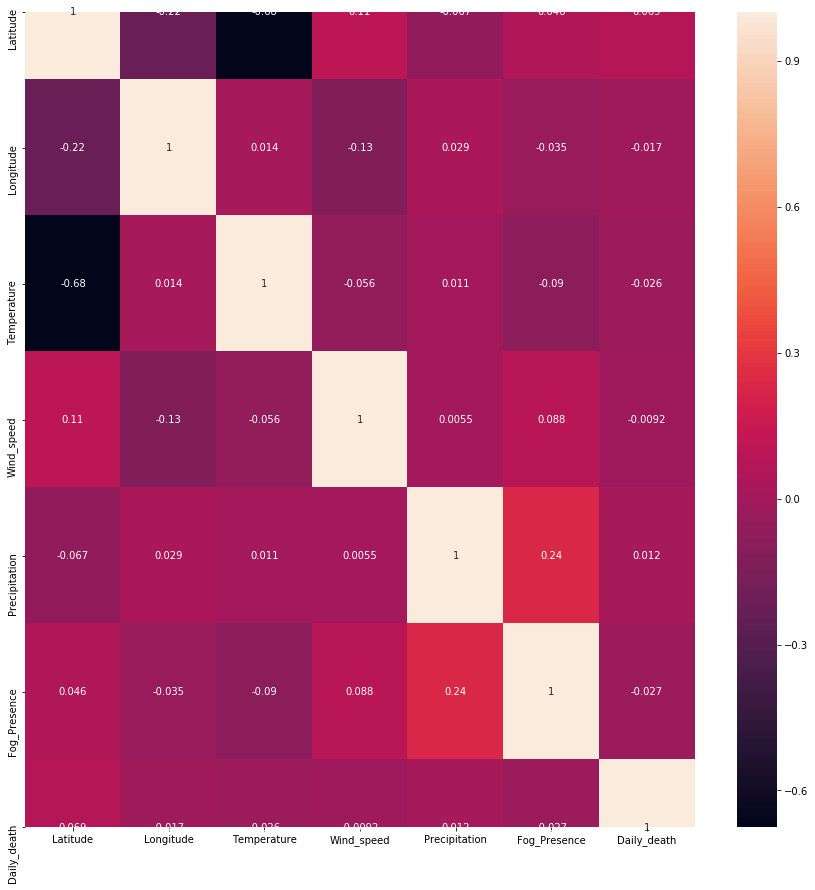

In [13]:
plt.figure(figsize=(15,15))
columns =['Latitude','Longitude','Temperature','Wind_speed','Precipitation','Fog_Presence','Daily_death']
sns.heatmap(df_main[columns].corr(),annot=True)

### "Latitude" is directly propotional to daily death while "Fog_presence" is inversely propotional to daily death

## Scatter plot between all continuous variables except "daily death"

<Figure size 720x432 with 0 Axes>

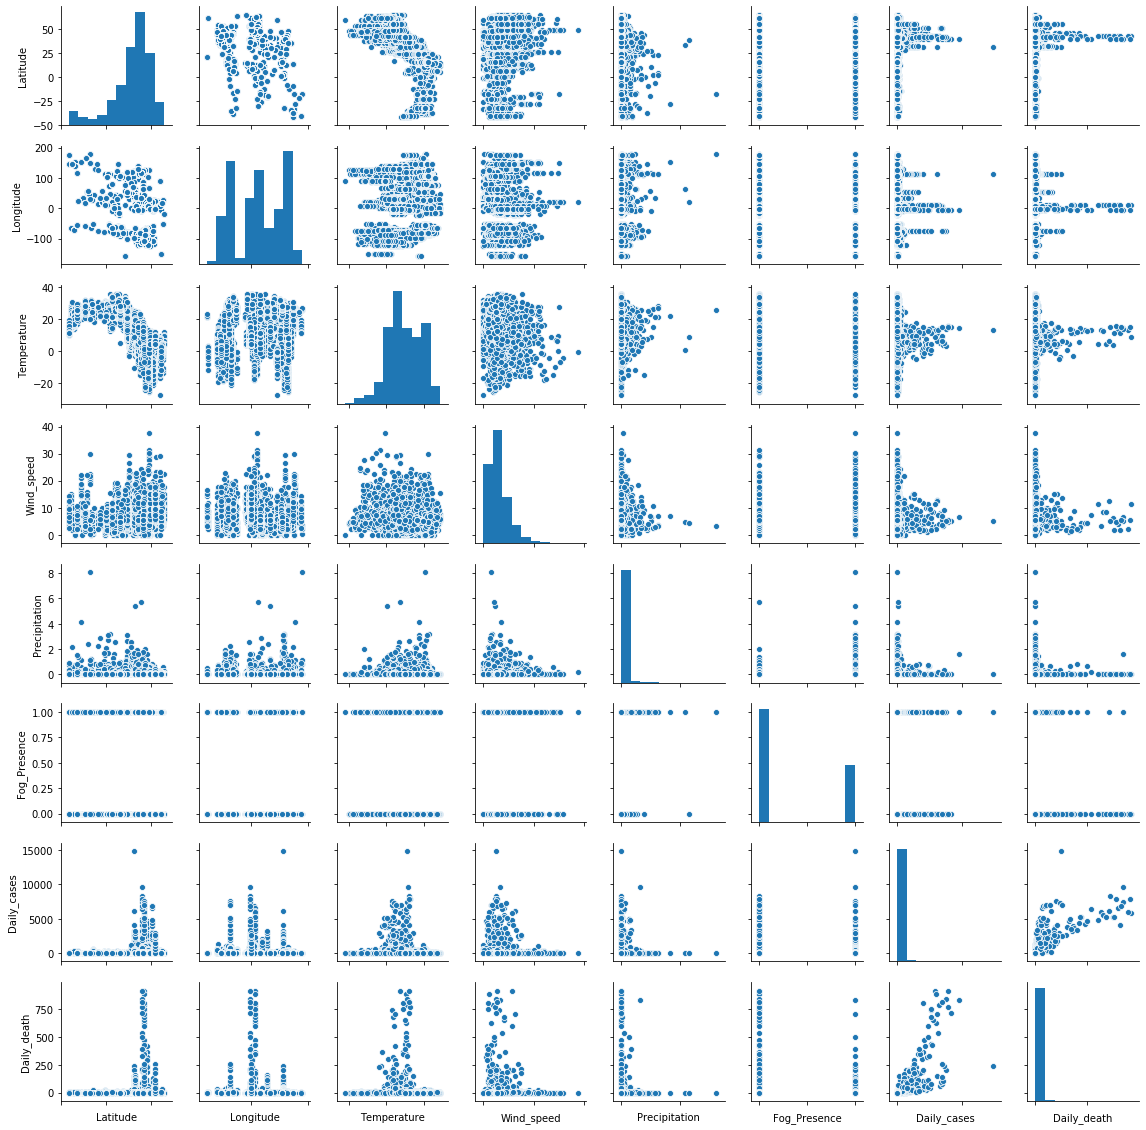

In [14]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(df_main[['Latitude','Longitude','Temperature','Wind_speed','Precipitation','Fog_Presence',
                     'Daily_cases','Daily_death']]
                 ,height=2)
g.set(xticklabels=[])

In [15]:
#find the minimum value of each continuous variable column
print(df_main['Latitude'].max())
print(df_main['Longitude'].max())
print(df_main['Temperature'].max())
print(df_main['Wind_speed'].max())
print(df_main['Precipitation'].max())
print(df_main['Fog_Presence'].max())
print(df_main['Daily_cases'].max())
print(df_main['Daily_death'].max())

64.9631
178.45
36.06
37.6
8.06
1
14840
919


# Removing Outliears

In [16]:

df_main['Latitude'].replace(df_main['Latitude'].max(), np.nan, inplace=True)
df_main['Latitude'].replace(np.nan, df_main['Latitude'].max(), inplace=True)

df_main['Longitude'].replace(df_main['Longitude'].max(), np.nan, inplace=True)
df_main['Longitude'].replace(np.nan, df_main['Longitude'].max(), inplace=True)

df_main['Temperature'].replace(df_main['Temperature'].max(), np.nan, inplace=True)
df_main['Temperature'].replace(np.nan, df_main['Temperature'].max(), inplace=True)

df_main['Wind_speed'].replace(df_main['Wind_speed'].max(), np.nan, inplace=True)
df_main['Wind_speed'].replace(np.nan, df_main['Wind_speed'].max(), inplace=True)

df_main['Precipitation'].replace(df_main['Precipitation'].max(), np.nan, inplace=True)   
df_main['Precipitation'].replace(df_main['Precipitation'].max(), np.nan, inplace=True)   
df_main['Precipitation'].replace(df_main['Precipitation'].max(), np.nan, inplace=True)
df_main['Precipitation'].replace(df_main['Precipitation'].max(), np.nan, inplace=True)   
df_main['Precipitation'].replace(np.nan, df_main['Precipitation'].max(), inplace=True)

df_main['Daily_cases'].replace(df_main['Daily_cases'].max(), np.nan, inplace=True)
df_main['Daily_cases'].replace(df_main['Daily_cases'].max(), np.nan, inplace=True)  
df_main['Daily_cases'].replace(np.nan, df_main['Daily_cases'].max(), inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Dataset after removing outliers

<Figure size 720x432 with 0 Axes>

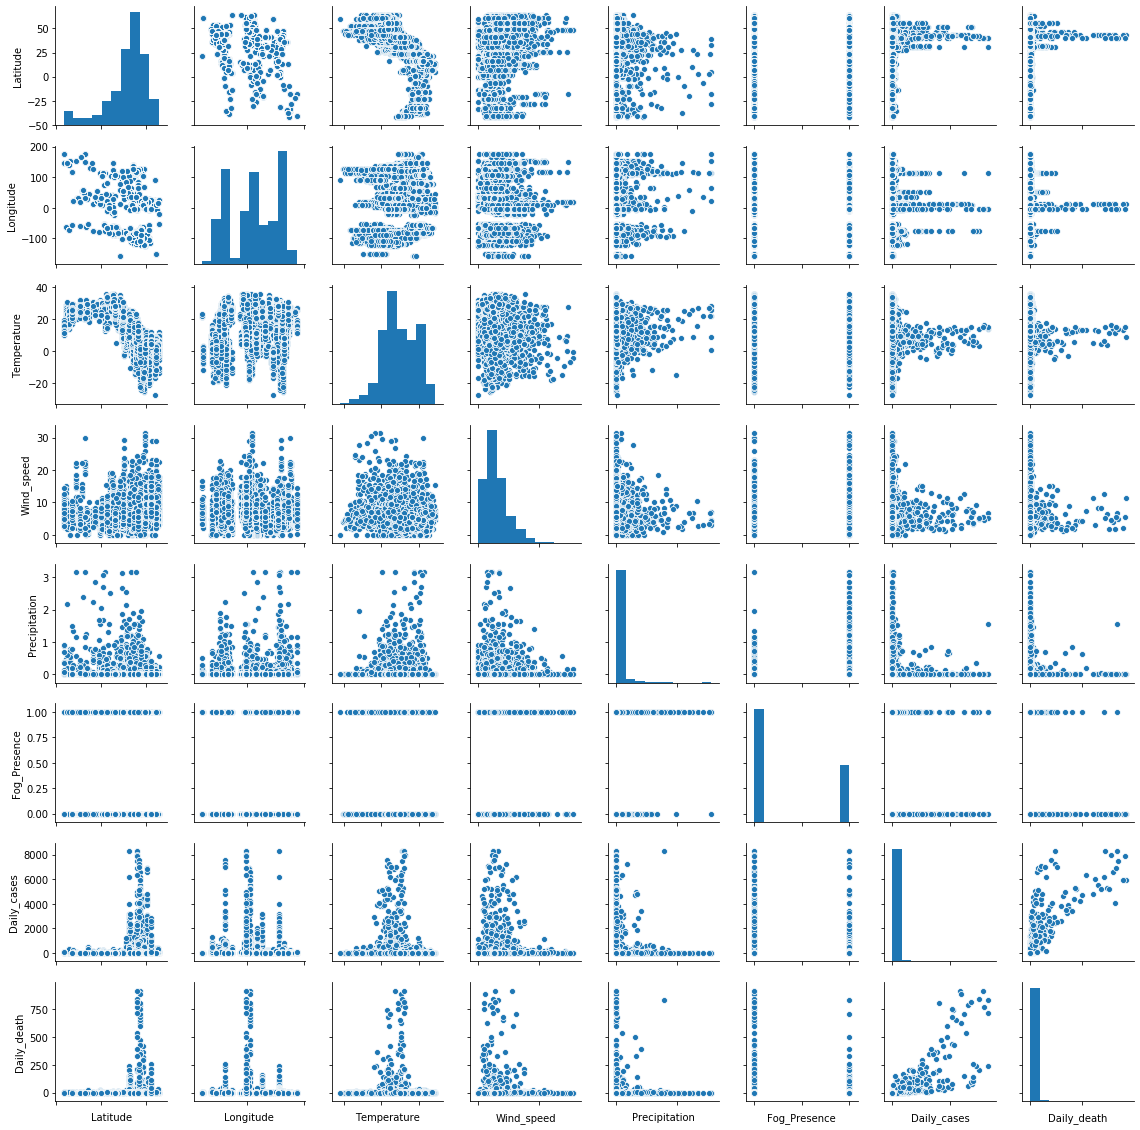

In [17]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(df_main[['Latitude','Longitude','Temperature','Wind_speed','Precipitation','Fog_Presence',
                     'Daily_cases','Daily_death']],height=2)
g.set(xticklabels=[])

## Log transformation to make variable normaly distributed

In [18]:
df_log_transform = df_main.copy()
df_log_transform['Latitude'] = np.log(df_log_transform['Latitude'] + 1 - df_log_transform['Latitude'].min())
df_log_transform['Longitude'] = np.log(df_log_transform['Longitude'] + 1 - df_log_transform['Longitude'].min())
df_log_transform['Temperature'] = np.log(df_log_transform['Temperature'] + 1 - df_log_transform['Temperature'].min())
df_log_transform['Wind_speed'] = np.log(df_log_transform['Wind_speed'] + 1 - df_log_transform['Wind_speed'].min())
df_log_transform['Precipitation'] = np.log(df_log_transform['Precipitation'] + 1 - df_log_transform['Precipitation'].min())
df_log_transform['Fog_Presence'] = np.log(df_log_transform['Fog_Presence'] + 1 - df_log_transform['Fog_Presence'].min())

## Scatter plot after applying log transformation

<Figure size 720x432 with 0 Axes>

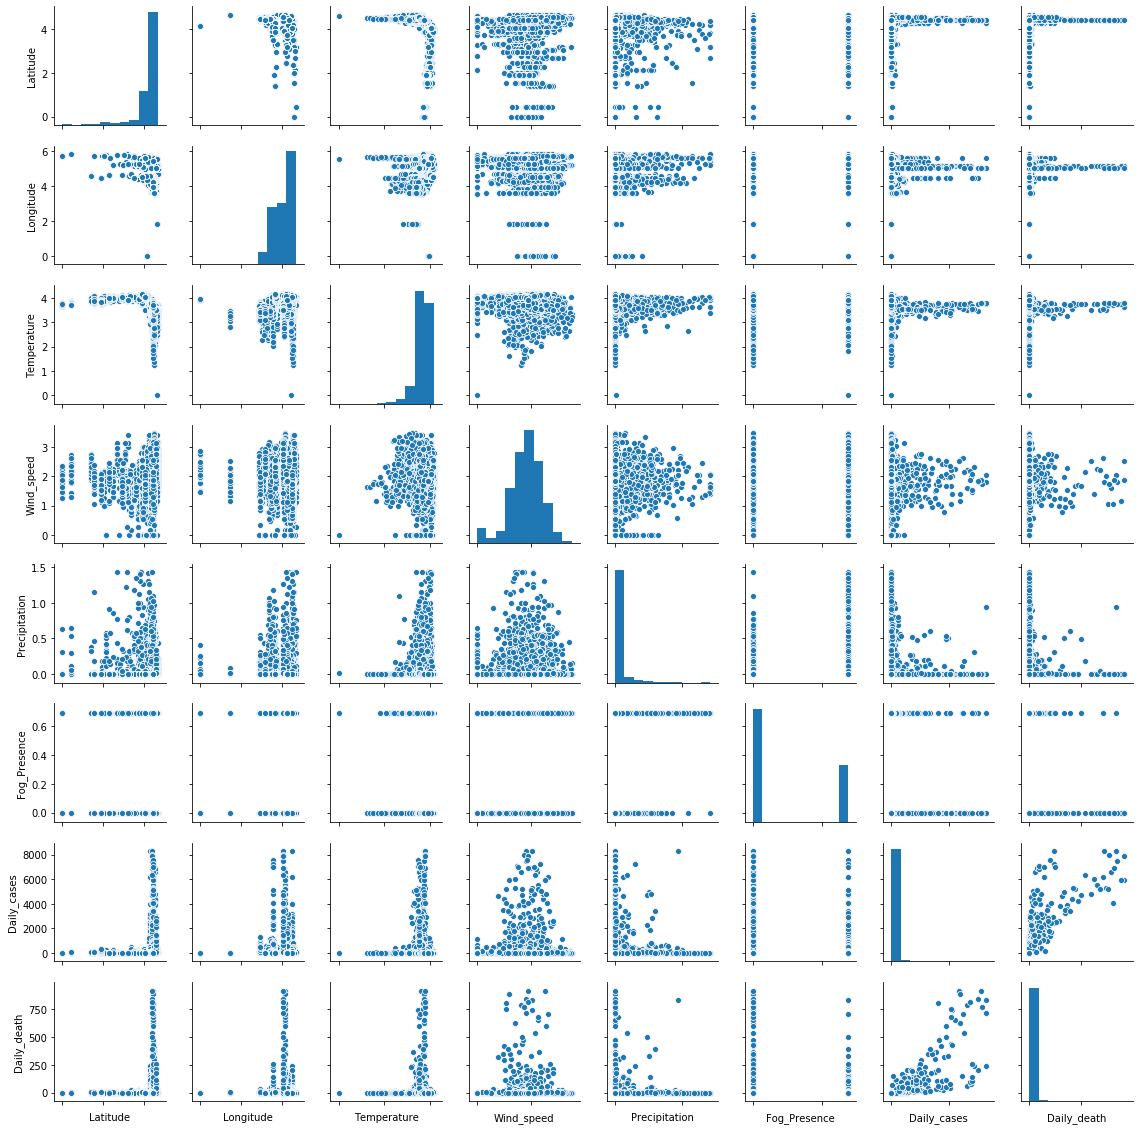

In [19]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(df_log_transform[['Date','Latitude','Longitude','Temperature','Wind_speed','Precipitation',
                                   'Fog_Presence','Daily_cases','Daily_death']],height=2)
g.set(xticklabels=[])

# Multilinear Regression (Target variable is daily cases)

In [20]:
np.random.seed(0)
df_train_cases, df_test_cases = train_test_split(df_main[['Latitude','Longitude','Temperature','Wind_speed','Precipitation',
                                              'Fog_Presence','Daily_cases']], 
                                     train_size = 0.7, test_size = 0.3, random_state = 100)

## multilieanear regression using log transformation

In [21]:
train_cases_log = df_train_cases.copy()
test_cases_log = df_test_cases.copy()
train_cases_log['Latitude'] = np.log(df_train_cases['Latitude'] + 1 - df_train_cases['Latitude'].min())
train_cases_log['Longitude'] = np.log(df_train_cases['Longitude'] + 1 - df_train_cases['Longitude'].min())
train_cases_log['Temperature'] = np.log(df_train_cases['Temperature'] + 1 - df_train_cases['Temperature'].min())
train_cases_log['Wind_speed'] = np.log(df_train_cases['Wind_speed'] + 1 - df_train_cases['Wind_speed'].min())
train_cases_log['Precipitation'] = np.log(df_train_cases['Precipitation'] + 1 - df_train_cases['Precipitation'].min())
train_cases_log['Daily_cases'] = np.log(df_train_cases['Daily_cases'] + 1 - df_train_cases['Daily_cases'].min())
train_cases_log

,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence,Daily_cases
615,1.943192,5.728510,3.710886,1.280934,0.000000,0,2.564949
11726,4.307387,5.019963,3.704014,1.824549,0.000000,0,4.007333
9646,4.296666,5.265269,3.753262,0.000000,0.000000,0,4.060443
9152,4.495545,5.181793,3.463859,2.208274,0.215111,1,0.693147
5717,3.850688,4.433207,3.710886,1.887070,0.000000,0,2.197225
...,...,...,...,...,...,...,...
3366,1.913889,4.465394,3.866398,2.066863,0.000000,0,2.890372
14551,3.901053,5.478546,3.978560,0.530628,0.000000,0,1.386294
5530,4.211068,5.560625,3.577110,1.960095,0.000000,0,2.708050
1312,4.212441,4.396484,3.950089,2.197225,0.000000,0,1.098612


In [22]:
y_train = train_cases_log.pop('Daily_cases')
X_train = train_cases_log

In [23]:
X_train_lm = sm.add_constant(X_train)
lr_c_11 = sm.OLS(y_train, X_train_lm).fit()
lr_c_11.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily_cases   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     16.91
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           2.23e-19
Time:                        21:10:56   Log-Likelihood:                -8016.3
No. Observations:                3919   AIC:                         1.605e+04
Df Residuals:                    3912   BIC:                         1.609e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9313      0.561      5.229      0.000       1.832       4.030
Latitude          0.3227      0.054      5.956      0.000       0.216       0.429
Longitude        -0.2887      0.047     -6.093      0.000      -0.382      -0.196
Temperature      -0.0805      0.091     -0.881      0.378      -0.260       0.099
Wind_speed        0.0031      0.051      0.061      0.951      -0.096       0.103
Precipitation     0.2914      0.220      1.324      0.186      -0.140       0.723
Fog_Presence      0.0350      0.067      0.522      0.602      -0.097       0.167
==============================================================================
Omnibus:                      255.808   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.411
Skew:                           0.674   Prob(JB):                     2.91e-67
Kurtosis:                       3.245   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,48.96
1,Longitude,45.79
0,Latitude,30.55
3,Wind_speed,10.01
5,Fog_Presence,1.70
4,Precipitation,1.23


In [25]:
X = X_train.drop('Wind_speed', 1)
X_train_lm2 = sm.add_constant(X)
lr_c_12 = sm.OLS(y_train, X_train_lm2).fit()
lr_c_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily_cases   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     20.30
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           4.68e-20
Time:                        21:10:56   Log-Likelihood:                -8016.3
No. Observations:                3919   AIC:                         1.604e+04
Df Residuals:                    3913   BIC:                         1.608e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9382      0.549      5.352      0.000       1.862       4.015
Latitude          0.3228      0.054      5.960      0.000       0.217       0.429
Longitude        -0.2889      0.047     -6.127      0.000      -0.381      -0.196
Temperature      -0.0806      0.091     -0.883      0.378      -0.260       0.098
Precipitation     0.2913      0.220      1.324      0.186      -0.140       0.723
Fog_Presence      0.0353      0.067      0.527      0.598      -0.096       0.167
==============================================================================
Omnibus:                      255.788   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.382
Skew:                           0.674   Prob(JB):                     2.95e-67
Kurtosis:                       3.245   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,46.50
1,Longitude,45.78
0,Latitude,28.93
4,Fog_Presence,1.69
3,Precipitation,1.23


## model evalution

In [27]:
test_cases_log['Latitude'] = np.log(df_test_cases['Latitude'] + 1 - df_test_cases['Latitude'].min())
test_cases_log['Longitude'] = np.log(df_test_cases['Longitude'] + 1 - df_test_cases['Longitude'].min())
test_cases_log['Temperature'] = np.log(df_test_cases['Temperature'] + 1 - df_test_cases['Temperature'].min())
test_cases_log['Precipitation'] = np.log(df_test_cases['Precipitation'] + 1 - df_test_cases['Precipitation'].min())
test_cases_log['Daily_cases'] = np.log(df_test_cases['Daily_cases'] + 1 - df_test_cases['Daily_cases'].min())
test_cases_log

,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence,Daily_cases
9641,4.296666,5.265269,3.797958,0.0,0.000000,0,2.639057
5289,4.291440,5.565319,3.718924,1.9,0.000000,1,0.000000
4326,4.296334,5.601266,3.776661,5.7,0.900161,1,3.713572
1150,4.499484,5.153571,3.393837,3.8,0.463734,1,2.639057
12614,4.634015,5.117797,3.600321,11.1,0.000000,0,4.718499
...,...,...,...,...,...,...,...
13397,4.629419,5.515436,0.000000,0.0,0.019803,1,0.693147
9700,4.447984,5.138725,3.595941,4.1,0.000000,0,5.480639
15651,4.333155,3.851574,3.851423,2.9,0.000000,0,0.693147
10095,4.362519,5.657733,3.432373,4.1,0.000000,0,0.693147


In [28]:
y_test = test_cases_log.pop('Daily_cases')
X_test = test_cases_log

# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m = X_test_m.drop(["Wind_speed"], axis = 1)

In [29]:
y_pred_m = lr_c_12.predict(X_test_m)
r2_score(y_true = y_test, y_pred = y_pred_m)

0.012956891979766683

## multilieanear regression using MinMaxScaler

In [30]:
train_cases_maxmin = df_train_cases.copy()
test_cases_maxmin = df_test_cases.copy()

In [31]:
scaler = MinMaxScaler()
num_vars = ['Latitude','Longitude','Temperature','Wind_speed','Precipitation','Daily_cases']
train_cases_maxmin[num_vars] = scaler.fit_transform(df_train_cases[num_vars])
train_cases_maxmin

,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence,Daily_cases
615,0.056619,0.922158,0.651584,0.082803,0.000000,0,0.001451
11726,0.693384,0.452505,0.647011,0.165605,0.000000,0,0.006530
9646,0.685889,0.579144,0.680497,0.000000,0.000000,0,0.006892
9152,0.838891,0.532521,0.505390,0.257962,0.076190,1,0.000121
5717,0.435699,0.250316,0.651584,0.178344,0.000000,0,0.000967
...,...,...,...,...,...,...,...
3366,0.054711,0.258602,0.763966,0.219745,0.000000,0,0.002056
14551,0.458694,0.717538,0.856583,0.022293,0.000000,0,0.000363
5530,0.628844,0.779174,0.567952,0.194268,0.000000,0,0.001693
1312,0.629721,0.241182,0.832081,0.254777,0.000000,0,0.000242


In [32]:
y_train2 = train_cases_maxmin.pop('Daily_cases')
X_train2 = train_cases_maxmin

In [33]:
X_train_lm3 = sm.add_constant(X_train2)
lr_c_21 = sm.OLS(y_train2, X_train_lm3).fit()
lr_c_21.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily_cases   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     11.10
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           2.58e-12
Time:                        21:10:57   Log-Likelihood:                 4835.6
No. Observations:                3919   AIC:                            -9657.
Df Residuals:                    3912   BIC:                            -9613.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0074      0.011     -0.691      0.489      -0.028       0.014
Latitude          0.0415      0.008      5.465      0.000       0.027       0.056
Longitude        -0.0090      0.005     -1.883      0.060      -0.018       0.000
Temperature       0.0048      0.009      0.560      0.576      -0.012       0.022
Wind_speed       -0.0128      0.009     -1.425      0.154      -0.030       0.005
Precipitation     0.0480      0.016      2.974      0.003       0.016       0.080
Fog_Presence     -0.0028      0.002     -1.139      0.255      -0.008       0.002
==============================================================================
Omnibus:                     5366.036   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           993561.117
Skew:                           8.025   Prob(JB):                         0.00
Kurtosis:                      79.335   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,5.91
0,Latitude,5.41
1,Longitude,4.86
3,Wind_speed,3.38
5,Fog_Presence,1.63
4,Precipitation,1.16


In [35]:
# Dropping highly correlated variables and insignificant variables
X = X_train2.drop('Temperature', 1)

# Build a fitted model after dropping the variable
X_train_lm4 = sm.add_constant(X)

lr_c_22 = sm.OLS(y_train2, X_train_lm4).fit()

# Printing the summary of the model
lr_c_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily_cases   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     13.26
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           7.68e-13
Time:                        21:10:58   Log-Likelihood:                 4835.4
No. Observations:                3919   AIC:                            -9659.
Df Residuals:                    3913   BIC:                            -9621.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0022      0.005     -0.413      0.679      -0.013       0.008
Latitude          0.0386      0.006      6.985      0.000       0.028       0.049
Longitude        -0.0095      0.005     -2.032      0.042      -0.019      -0.000
Wind_speed       -0.0127      0.009     -1.413      0.158      -0.030       0.005
Precipitation     0.0478      0.016      2.964      0.003       0.016       0.079
Fog_Presence     -0.0030      0.002     -1.189      0.235      -0.008       0.002
==============================================================================
Omnibus:                     5366.760   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           994672.880
Skew:                           8.026   Prob(JB):                         0.00
Kurtosis:                      79.379   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Latitude,5.00
1,Longitude,3.56
2,Wind_speed,3.09
4,Fog_Presence,1.63
3,Precipitation,1.16


## Model evalution

In [37]:
test_vars = ['Latitude','Longitude','Temperature','Wind_speed','Precipitation','Daily_cases']
test_cases_maxmin[num_vars] = scaler.transform(test_cases_maxmin[num_vars])
test_cases_maxmin

,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence,Daily_cases
9641,0.685889,0.579144,0.672329,0.000000,0.000000,0,0.001572
5289,0.682264,0.782855,0.616955,0.060510,0.000000,1,0.000000
4326,0.685658,0.811618,0.656975,0.181529,0.463492,1,0.004837
1150,0.842239,0.517619,0.430088,0.121019,0.187302,1,0.001572
12614,0.964885,0.499323,0.541653,0.353503,0.000000,0,0.013422
...,...,...,...,...,...,...,...
13397,0.960417,0.744615,-0.040020,0.000000,0.006349,1,0.000121
9700,0.799487,0.509947,0.539040,0.130573,0.000000,0,0.028900
15651,0.711731,0.138596,0.712349,0.092357,0.000000,0,0.000121
10095,0.733221,0.858940,0.449200,0.130573,0.000000,0,0.000121


In [38]:
y_test = test_cases_maxmin.pop('Daily_cases')
X_test = test_cases_maxmin

# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m = X_test_m.drop(['Temperature'], axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
y_pred_m = lr_c_22.predict(X_test_m)
r2_score(y_true = y_test, y_pred = y_pred_m)

0.0055677101719011635

# Multilieanear regression (Target variable is daily death)

In [40]:
np.random.seed(0)
df_train_death, df_test_death = train_test_split(df_main[['Latitude','Longitude','Temperature','Wind_speed','Precipitation',
                                           'Fog_Presence','Daily_death']], 
                                            train_size = 0.7, test_size = 0.3, random_state = 100)

## multilieanear regression using log transformation

In [41]:
train_death_log = df_train_death.copy()
test_death_log = df_test_death.copy()

train_death_log['Latitude'] = np.log(df_train_death['Latitude'] + 1 - df_train_death['Latitude'].min())
train_death_log['Longitude'] = np.log(df_train_death['Longitude'] + 1 - df_train_death['Longitude'].min())
train_death_log['Temperature'] = np.log(df_train_death['Temperature'] + 1 - df_train_death['Temperature'].min())
train_death_log['Wind_speed'] = np.log(df_train_death['Wind_speed'] + 1 - df_train_death['Wind_speed'].min())
train_death_log['Precipitation'] = np.log(df_train_death['Precipitation'] + 1 - df_train_death['Precipitation'].min())
#train_death_log['Fog_Presence'] = np.log(df_train_death['Fog_Presence'] + 1 - df_train_death['Fog_Presence'].min())
train_death_log['Daily_death'] = np.log(df_train_death['Daily_death'] + 1 - df_train_death['Daily_death'].min())
train_death_log

,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence,Daily_death
615,1.943192,5.728510,3.710886,1.280934,0.000000,0,0.000000
11726,4.307387,5.019963,3.704014,1.824549,0.000000,0,0.693147
9646,4.296666,5.265269,3.753262,0.000000,0.000000,0,0.000000
9152,4.495545,5.181793,3.463859,2.208274,0.215111,1,0.000000
5717,3.850688,4.433207,3.710886,1.887070,0.000000,0,0.000000
...,...,...,...,...,...,...,...
3366,1.913889,4.465394,3.866398,2.066863,0.000000,0,0.000000
14551,3.901053,5.478546,3.978560,0.530628,0.000000,0,0.000000
5530,4.211068,5.560625,3.577110,1.960095,0.000000,0,0.000000
1312,4.212441,4.396484,3.950089,2.197225,0.000000,0,0.000000


In [42]:
y_train3 = train_death_log.pop('Daily_death')
X_train3 = train_death_log

In [43]:
X_train_lm_1 = sm.add_constant(X_train3)

lr_d_11 = sm.OLS(y_train3, X_train_lm_1).fit()

lr_d_11.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily_death   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     12.37
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           7.53e-14
Time:                        21:11:00   Log-Likelihood:                -5526.1
No. Observations:                3919   AIC:                         1.107e+04
Df Residuals:                    3912   BIC:                         1.111e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4446      0.297     -1.497      0.134      -1.027       0.138
Latitude          0.2123      0.029      7.398      0.000       0.156       0.269
Longitude        -0.0622      0.025     -2.479      0.013      -0.111      -0.013
Temperature       0.0840      0.048      1.737      0.082      -0.011       0.179
Wind_speed        0.0083      0.027      0.310      0.757      -0.044       0.061
Precipitation     0.2646      0.117      2.269      0.023       0.036       0.493
Fog_Presence     -0.0742      0.036     -2.085      0.037      -0.144      -0.004
==============================================================================
Omnibus:                     2638.078   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28989.140
Skew:                           3.193   Prob(JB):                         0.00
Kurtosis:                      14.694   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,48.96
1,Longitude,45.79
0,Latitude,30.55
3,Wind_speed,10.01
5,Fog_Presence,1.70
4,Precipitation,1.23


In [45]:
X = X_train3.drop('Wind_speed', 1)
X_train_lm_2 = sm.add_constant(X)
lr_d_12 = sm.OLS(y_train3, X_train_lm_2).fit()
lr_d_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily_death   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     14.83
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           1.92e-14
Time:                        21:11:00   Log-Likelihood:                -5526.2
No. Observations:                3919   AIC:                         1.106e+04
Df Residuals:                    3913   BIC:                         1.110e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4260      0.291     -1.465      0.143      -0.996       0.144
Latitude          0.2125      0.029      7.409      0.000       0.156       0.269
Longitude        -0.0630      0.025     -2.521      0.012      -0.112      -0.014
Temperature       0.0838      0.048      1.732      0.083      -0.011       0.179
Precipitation     0.2645      0.117      2.268      0.023       0.036       0.493
Fog_Presence     -0.0735      0.035     -2.070      0.039      -0.143      -0.004
==============================================================================
Omnibus:                     2638.237   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28991.901
Skew:                           3.193   Prob(JB):                         0.00
Kurtosis:                      14.694   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,46.50
1,Longitude,45.78
0,Latitude,28.93
4,Fog_Presence,1.69
3,Precipitation,1.23


## Model evaluation

In [47]:
test_death_log['Latitude'] = np.log(df_test_death['Latitude'] + 1 - df_test_death['Latitude'].min())
test_death_log['Longitude'] = np.log(df_test_death['Longitude'] + 1 - df_test_death['Longitude'].min())
test_death_log['Temperature'] = np.log(df_test_death['Temperature'] + 1 - df_test_death['Temperature'].min())
test_death_log['Precipitation'] = np.log(df_test_death['Precipitation'] + 1 - df_test_death['Precipitation'].min())
test_death_log['Daily_death'] = np.log(df_test_death['Daily_death'] + 1 - df_test_death['Daily_death'].min())
test_death_log

,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence,Daily_death
9641,4.296666,5.265269,3.797958,0.0,0.000000,0,0.000000
5289,4.291440,5.565319,3.718924,1.9,0.000000,1,0.000000
4326,4.296334,5.601266,3.776661,5.7,0.900161,1,3.332205
1150,4.499484,5.153571,3.393837,3.8,0.463734,1,0.000000
12614,4.634015,5.117797,3.600321,11.1,0.000000,0,0.000000
...,...,...,...,...,...,...,...
13397,4.629419,5.515436,0.000000,0.0,0.019803,1,0.000000
9700,4.447984,5.138725,3.595941,4.1,0.000000,0,2.197225
15651,4.333155,3.851574,3.851423,2.9,0.000000,0,0.000000
10095,4.362519,5.657733,3.432373,4.1,0.000000,0,0.000000


In [48]:
y_test = test_death_log.pop('Daily_death')
X_test = test_death_log

# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m = X_test_m.drop(["Wind_speed"], axis = 1)

In [49]:
y_pred_m = lr_d_12.predict(X_test_m)
r2_score(y_true = y_test, y_pred = y_pred_m)

0.012243064306937557

## Multilieanear regression using MinMaxScaler

In [50]:
train_death_maxmin = df_train_death.copy()
test_death_maxmin = df_test_death.copy()


In [51]:
scaler = MinMaxScaler()
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Latitude','Longitude','Temperature','Wind_speed','Precipitation','Daily_death']
train_death_maxmin[num_vars] = scaler.fit_transform(df_train_death[num_vars])

train_death_maxmin

,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence,Daily_death
615,0.056619,0.922158,0.651584,0.082803,0.000000,0,0.000000
11726,0.693384,0.452505,0.647011,0.165605,0.000000,0,0.001088
9646,0.685889,0.579144,0.680497,0.000000,0.000000,0,0.000000
9152,0.838891,0.532521,0.505390,0.257962,0.076190,1,0.000000
5717,0.435699,0.250316,0.651584,0.178344,0.000000,0,0.000000
...,...,...,...,...,...,...,...
3366,0.054711,0.258602,0.763966,0.219745,0.000000,0,0.000000
14551,0.458694,0.717538,0.856583,0.022293,0.000000,0,0.000000
5530,0.628844,0.779174,0.567952,0.194268,0.000000,0,0.000000
1312,0.629721,0.241182,0.832081,0.254777,0.000000,0,0.000000


In [52]:
y_train4 = train_death_maxmin.pop('Daily_death')
X_train4 = train_death_maxmin

In [53]:
X_train_lm_5 = sm.add_constant(X_train4)
lr_d_21 = sm.OLS(y_train4, X_train_lm_5).fit()
lr_d_21.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily_death   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.021
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           2.78e-06
Time:                        21:11:01   Log-Likelihood:                 5931.8
No. Observations:                3919   AIC:                        -1.185e+04
Df Residuals:                    3912   BIC:                        -1.181e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0130      0.008     -1.611      0.107      -0.029       0.003
Latitude          0.0255      0.006      4.431      0.000       0.014       0.037
Longitude     -3.304e-05      0.004     -0.009      0.993      -0.007       0.007
Temperature       0.0092      0.006      1.425      0.154      -0.003       0.022
Wind_speed       -0.0083      0.007     -1.221      0.222      -0.022       0.005
Precipitation     0.0361      0.012      2.962      0.003       0.012       0.060
Fog_Presence     -0.0047      0.002     -2.474      0.013      -0.008      -0.001
==============================================================================
Omnibus:                     6966.066   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5979441.664
Skew:                          12.841   Prob(JB):                         0.00
Kurtosis:                     192.627   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,5.91
0,Latitude,5.41
1,Longitude,4.86
3,Wind_speed,3.38
5,Fog_Presence,1.63
4,Precipitation,1.16


In [55]:
# Dropping highly correlated variables and insignificant variables
X = X_train4.drop('Longitude', 1)

# Build a fitted model after dropping the variable
X_train_lm_6 = sm.add_constant(X)

lr_d_22 = sm.OLS(y_train4, X_train_lm_6).fit()

# Printing the summary of the model
lr_d_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily_death   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.228
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           9.56e-07
Time:                        21:11:01   Log-Likelihood:                 5931.8
No. Observations:                3919   AIC:                        -1.185e+04
Df Residuals:                    3913   BIC:                        -1.181e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0131      0.007     -1.848      0.065      -0.027       0.001
Latitude          0.0255      0.006      4.610      0.000       0.015       0.036
Temperature       0.0092      0.006      1.455      0.146      -0.003       0.022
Wind_speed       -0.0083      0.007     -1.226      0.220      -0.021       0.005
Precipitation     0.0361      0.012      2.963      0.003       0.012       0.060
Fog_Presence     -0.0047      0.002     -2.475      0.013      -0.008      -0.001
==============================================================================
Omnibus:                     6966.069   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5979456.470
Skew:                          12.841   Prob(JB):                         0.00
Kurtosis:                     192.628   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Latitude,4.78
1,Temperature,4.33
2,Wind_speed,3.38
4,Fog_Presence,1.63
3,Precipitation,1.16


## Model evaluation

In [57]:
test_vars = ['Latitude','Longitude','Temperature','Wind_speed','Precipitation','Daily_death']
test_death_maxmin[num_vars] = scaler.transform(test_death_maxmin[num_vars])
test_death_maxmin

,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence,Daily_death
9641,0.685889,0.579144,0.672329,0.000000,0.000000,0,0.000000
5289,0.682264,0.782855,0.616955,0.060510,0.000000,1,0.000000
4326,0.685658,0.811618,0.656975,0.181529,0.463492,1,0.029380
1150,0.842239,0.517619,0.430088,0.121019,0.187302,1,0.000000
12614,0.964885,0.499323,0.541653,0.353503,0.000000,0,0.000000
...,...,...,...,...,...,...,...
13397,0.960417,0.744615,-0.040020,0.000000,0.006349,1,0.000000
9700,0.799487,0.509947,0.539040,0.130573,0.000000,0,0.008705
15651,0.711731,0.138596,0.712349,0.092357,0.000000,0,0.000000
10095,0.733221,0.858940,0.449200,0.130573,0.000000,0,0.000000


In [58]:
y_test = test_death_maxmin.pop('Daily_death')
X_test = test_death_maxmin

# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m = X_test_m.drop(["Longitude"], axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [59]:
y_pred_m = lr_d_22.predict(X_test_m)
r2_score(y_true = y_test, y_pred = y_pred_m)

0.00305343616558329

# Lieanear regression (target variable is daily cases)

In [60]:
df_lr_cases = df_main[['Latitude','Longitude','Temperature','Wind_speed','Precipitation','Fog_Presence','Daily_cases']]
df_lr_cases.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6','Y']
df_lr_cases.head()

,X1,X2,X3,X4,X5,X6,Y
33,33.0,65.0,4.44,4.0,0.47,1,1.0
46,33.0,65.0,-1.89,3.6,0.00,1,3.0
48,33.0,65.0,-1.72,5.3,0.12,1,1.0
49,33.0,65.0,-2.94,3.9,0.00,1,2.0
52,33.0,65.0,2.44,5.3,0.00,1,4.0


In [61]:
model = LinearRegression()
X = df_lr_cases[ ['X1', 'X2', 'X3', 'X4', 'X5', 'X6'] ]
y = df_lr_cases[ ['Y'] ]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3)

# Fit the model to the full dataset
model.fit(X_train, y_train)
print(f'The score of linear regression for daily cases is: {model.score(X_train, y_train)}')
print(f'Intercept of linear regression is {model.intercept_}')
print(f'Coefficient of linear regression is {model.coef_}')

The score of linear regression for daily cases is: 0.01413333111565962
Intercept of linear regression is [51.12684277]
Coefficient of linear regression is [[  3.60687238  -0.28825498   1.3806063   -3.51007481 101.71597917
  -21.12532413]]


In [62]:
y_pred = model.predict(X_test)

print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

203.8356469550698
242288.92083921688
14.277102190398084


# Lieanear regression (target variable is daily death)

In [63]:
df_lr_death = df_main[['Latitude','Longitude','Temperature','Wind_speed','Precipitation','Fog_Presence','Daily_death']]

df_lr_death.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6','Y']
df_lr_death.head()

,X1,X2,X3,X4,X5,X6,Y
33,33.0,65.0,4.44,4.0,0.47,1,0
46,33.0,65.0,-1.89,3.6,0.00,1,0
48,33.0,65.0,-1.72,5.3,0.12,1,0
49,33.0,65.0,-2.94,3.9,0.00,1,0
52,33.0,65.0,2.44,5.3,0.00,1,0


In [64]:
model = LinearRegression()
X = df_lr_death[ ['X1', 'X2', 'X3', 'X4', 'X5', 'X6'] ]
y = df_lr_death[ ['Y'] ]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3)

# Fit the model to the full dataset
model.fit(X_train, y_train)
print(f'The score of linear regression for daily death is: {model.score(X_train, y_train)}')
print(f'Intercept of linear regression is {model.intercept_}')
print(f'Coefficient of linear regression is {model.coef_}')

The score of linear regression for daily death is: 0.007382566807330182
Intercept of linear regression is [0.63113036]
Coefficient of linear regression is [[ 2.33347516e-01  2.81383458e-03  1.53265362e-01 -1.52593421e-01
   2.85253703e+00 -4.68842488e+00]]


In [65]:
y_pred = model.predict(X_test)

print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

11.632046168505786
1874.690015625511
3.410578568000712


# LASSO regression (target variable is daily cases)

In [66]:
from sklearn.model_selection import train_test_split
X_train_ls, X_val_ls, y_train_ls, y_val_ls = train_test_split(df_lr_cases[ ['X1', 'X2', 'X3', 'X4', 'X5', 'X6'] ], 
                                                              df_lr_cases[ ['Y'] ], test_size=.3, random_state=1)

# Mean Absolute Error (MAE) for validation
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [67]:
# Scale the data as before
std = StandardScaler()
std.fit(X_train_ls.values)

# Scale the Predictors on both the train and validation set
X_train_scaled = std.transform(X_train_ls.values)
X_val_scaled = std.transform(X_val_ls.values)

alphavec = 10**np.linspace(-3,3,200)
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_scaled, y_train_ls)

# This is the best alpha value found
lasso_model.alpha_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3.6123426997094303

In [68]:
# display all coefficients in the model with optimal alpha
list(zip(X_train_ls.columns, lasso_model.coef_))

[('X1', 63.078648818690816),
 ('X2', -12.199999312526304),
 ('X3', 0.0),
 ('X4', -13.416623618270977),
 ('X5', 18.284967703400554),
 ('X6', -0.7169282093478736)]

In [69]:
r2_score(y_val_ls, lasso_model.predict(X_val_scaled))

0.010476754501318686

In [70]:
print(f'Lasso regression val R^2: {lasso_model.score(X_val_scaled, y_val_ls):.3f}')

Lasso regression val R^2: 0.010


In [71]:
# evaluate model
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from numpy import absolute
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lasso_model, X_val_scaled, y_val_ls, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 199.289 (36.218)


# LASSO regression (target variable is daily death)

In [72]:
X_train_ls, X_val_ls, y_train_ls, y_val_ls = train_test_split(df_lr_death[ ['X1', 'X2', 'X3', 'X4', 'X5', 'X6'] ], 
                                                              df_lr_death[ ['Y'] ], test_size=.3, random_state=1)


In [73]:
std = StandardScaler()
std.fit(X_train_ls.values)

# Scale the Predictors on both the train and validation set
X_train_scaled = std.transform(X_train_ls.values)
X_val_scaled = std.transform(X_val_ls.values)
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_scaled, y_train_ls)


# This is the best alpha value found
lasso_model.alpha_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.001

In [74]:
list(zip(X_train_ls.columns, lasso_model.coef_))

[('X1', 4.833342366081169),
 ('X2', 0.17941793941332618),
 ('X3', 1.7315854855139525),
 ('X4', -1.325680453751225),
 ('X5', 2.0334654716533547),
 ('X6', -1.4841980324738442)]

In [75]:
r2_score(y_val_ls, lasso_model.predict(X_val_scaled))

0.0049472675339309324

In [76]:
print(f'Lasso regression val R^2: {lasso_model.score(X_val_scaled, y_val_ls):.3f}')

Lasso regression val R^2: 0.005


In [77]:
# evaluate model
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from numpy import absolute
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lasso_model, X_val_scaled, y_val_ls, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 13.046 (3.174)


In [78]:
## cross validation using KFold (on the 100% dataset, without manually splitting)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Split data to k-folds and impemement K-fold validation
kf = KFold(n_splits=5, shuffle=True, random_state = 1)
cvs_lasso = cross_val_score(lasso_model, X_val_scaled, y_val_ls, cv=kf, scoring='r2')
print(cvs_lasso)
print('Lasso regression cv R^2:', round(np.mean(cvs_lasso),3), '+-', round(np.std(cvs_lasso),3) )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d

[ 0.00411236  0.01033203 -0.00525022  0.00425478  0.00733232]
Lasso regression cv R^2: 0.004 +- 0.005


# Classification modelling

In [79]:
#check what is the max cases and death in a day in dataset to categorize them
print(df_main['Daily_cases'].max())
print(df_main['Daily_death'].max())

8271.0
919


In [80]:
df_class = df_main.copy()
# Create Classification version of target variable
df_class['cases_severity'] = [1 if x > 1000 else 0 for x in df_class['Daily_cases']]
df_class['death_severity'] = [1 if x > 100 else 0 for x in df_class['Daily_death']]
# Separate feature variables and target variable
X = df_class.drop(['Date','State','Country','Daily_cases','Daily_death','cases_severity', 'death_severity',
                   'Cumulative_cases','Cumulative_death'], axis = 1)
y = df_class['cases_severity']
z = df_class['death_severity']
X.head()


,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
33,33.0,65.0,4.44,4.0,0.47,1
46,33.0,65.0,-1.89,3.6,0.00,1
48,33.0,65.0,-1.72,5.3,0.12,1
49,33.0,65.0,-2.94,3.9,0.00,1
52,33.0,65.0,2.44,5.3,0.00,1


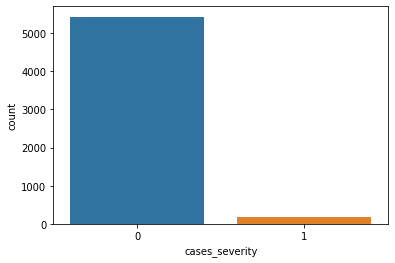

In [81]:
#check distribution of number of cases and death serverities using bar chart
sns.countplot(df_class['cases_severity'])


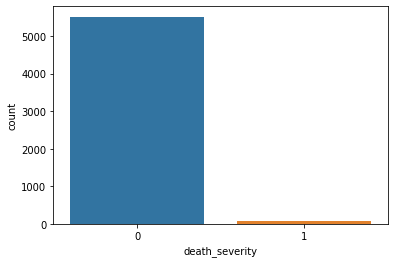

In [82]:
sns.countplot(df_class['death_severity'])

In [83]:
#balance number of cases and death severities using SMOTE
over_sampler = SMOTE()
X_res_case, y_res = over_sampler.fit_resample(X, y)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y)}")

Training target statistics: Counter({0: 5430, 1: 5430})
Testing target statistics: Counter({0: 5430, 1: 170})


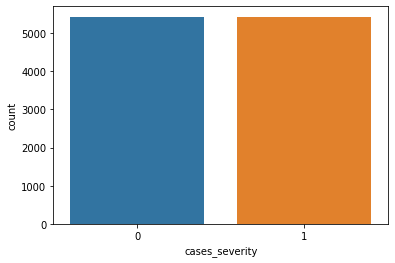

In [84]:
sns.countplot(y_res)

In [85]:
over_sampler = SMOTE()
X_res_death, z_res = over_sampler.fit_resample(X, z)
print(f"Training target statistics: {Counter(z_res)}")
print(f"Testing target statistics: {Counter(z)}")

Training target statistics: Counter({0: 5517, 1: 5517})
Testing target statistics: Counter({0: 5517, 1: 83})


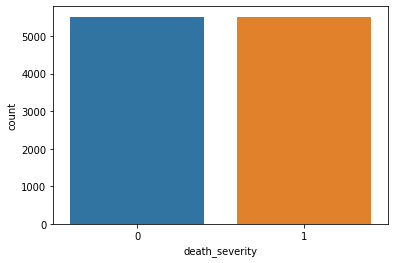

In [86]:
sns.countplot(z_res)

In [87]:
#Divide dataset into test and train datasets
X_train_case, X_test_case, y_train_case, y_test_case = train_test_split(X_res_case, y_res, test_size=0.3,random_state=0)

X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(X_res_death, z_res, test_size=0.3,random_state=0)

scaler = MinMaxScaler()
X_train_case = scaler.fit_transform(X_train_case)
X_test_case = scaler.transform(X_test_case)

X_train_death = scaler.fit_transform(X_train_death)
X_test_death = scaler.transform(X_test_death)

## Logistic regression to predict daily cases

In [88]:
logreg = LogisticRegression()
logreg.fit(X_train_case, y_train_case)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train_case, y_train_case)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test_case, y_test_case)))

Accuracy of Logistic regression classifier on training set: 0.64
Accuracy of Logistic regression classifier on test set: 0.64


In [89]:
pred_lr = logreg.predict(X_test_case)
expl_lr = explained_variance_score(pred_lr,y_test_case)
print(expl_lr)

-0.4507919754944869


In [90]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,6)
rfe.fit(X_train_case,y_train_case)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=6, step=1, verbose=0)

In [91]:
RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=6, step=1, verbose=0)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=6, step=1, verbose=0)

In [92]:
list(zip(X_train_case,rfe.support_,rfe.ranking_))

[(array([0.40457652, 0.78623328, 0.89839922, 0.16242038, 0.        ,
         0.        ]), True, 1),
 (array([0.69535553, 0.63329796, 0.56014683, 0.16045462, 0.        ,
         0.        ]), True, 1),
 (array([0.06177825, 0.89083329, 0.71496243, 0.19745223, 0.        ,
         0.        ]), True, 1),
 (array([0.69535553, 0.63329796, 0.59624947, 0.23483476, 0.03890267,
         0.        ]), True, 1),
 (array([0.70520635, 0.22219822, 0.6950343 , 0.18471338, 0.        ,
         1.        ]), True, 1),
 (array([0.77281406, 0.82408375, 0.58069258, 0.16242038, 0.        ,
         0.        ]), True, 1)]

In [93]:
#rfe_col = list(X_train_case[rfe.support_])
#rfe_col

## Logistic regression to predict daily death

In [94]:
logreg = LogisticRegression()
logreg.fit(X_train_death, y_train_death)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train_death, y_train_death)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test_death, y_test_death)))

Accuracy of Logistic regression classifier on training set: 0.72
Accuracy of Logistic regression classifier on test set: 0.73


In [95]:
pred_lr = logreg.predict(X_test_death)
expl_lr = explained_variance_score(pred_lr,y_test_death)
print(expl_lr)

-0.10267512410369539


## Random forest for daily cases

In [96]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_case,y_train_case)
random_score = random_forest.score(X_test_case,y_test_case)
pred_rf = random_forest.predict(X_test_case)
rf_score = round(random_score * 100, 2)
expl_rf = explained_variance_score(pred_rf,y_test_case)

In [97]:
print("Random forest classification Model Score for daily cases is ",rf_score)
print(expl_rf)

Random forest classification Model Score for daily cases is  98.13
0.925259430760645


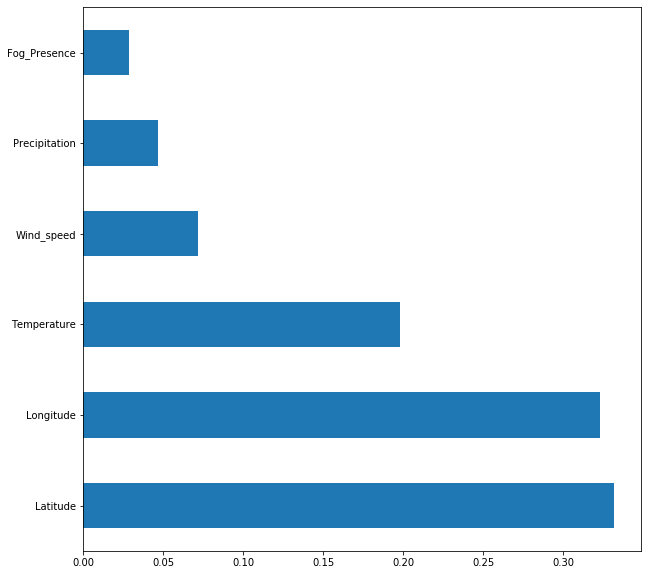

In [98]:
feat_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

## Random forest for daily death

In [99]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_death,y_train_death)
random_score = random_forest.score(X_test_death,y_test_death)
pred_rf = random_forest.predict(X_test_death)
rf_score = round(random_score * 100, 2)
expl_rf = explained_variance_score(pred_rf,y_test_death)

In [100]:
print("Random forest classification Model Score for daily death is ",rf_score)
print(expl_rf)

Random forest classification Model Score for daily death is  98.91
0.9566488247818736


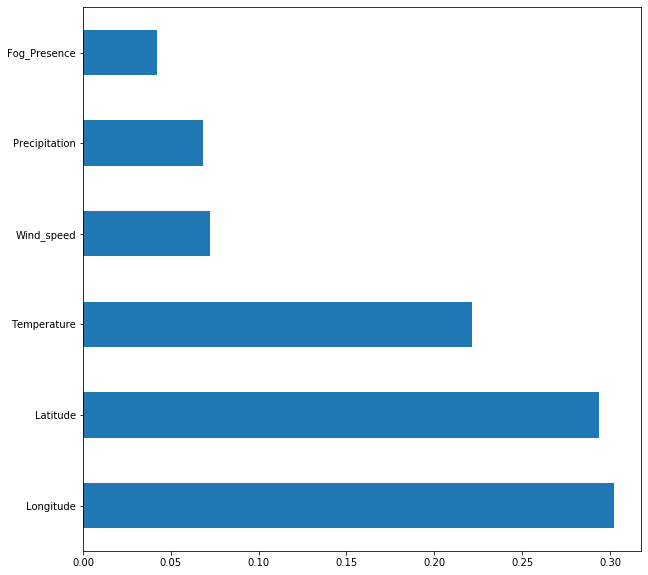

In [101]:
feat_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

# Socio-Eco analysis

In [102]:
df_socio_eco = pd.read_csv('C:/Documents/Post Graduate Study/Higher Diploma DA/final project/datasets/final ds/covid19/socio-eco-covid2.csv')

In [103]:
print(df_socio_eco.isnull().sum())
df_socio_eco.isna().any()
df_socio_eco.info()

Country                0
Population             0
Median_Age             0
Sex Ratio              0
Age%_65+               0
Lung Patients (F)      0
Lung Patients (M)      0
Life Expectancy (M)    0
Life Expectancy (F)    0
Total Cases            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
Country                90 non-null object
Population             90 non-null int64
Median_Age             90 non-null float64
Sex Ratio              90 non-null float64
Age%_65+               90 non-null float64
Lung Patients (F)      90 non-null float64
Lung Patients (M)      90 non-null float64
Life Expectancy (M)    90 non-null float64
Life Expectancy (F)    90 non-null float64
Total Cases            90 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 7.2+ KB


In [104]:
avg_lung_patient_f = df_socio_eco['Lung Patients (F)'].mean()
avg_lung_patient_m = df_socio_eco['Lung Patients (M)'].mean()
avg_life_expentancy_m = df_socio_eco['Life Expectancy (M)'].mean()
avg_life_expentancy_f = df_socio_eco['Life Expectancy (F)'].mean()
avg_sex_ratio = df_socio_eco['Sex Ratio'].mean()


In [105]:
df_socio_eco['Lung Patients (F)'].replace(np.nan, avg_lung_patient_f, inplace=True)
df_socio_eco['Lung Patients (M)'].replace(np.nan, avg_lung_patient_m, inplace=True)
df_socio_eco['Life Expectancy (F)'].replace(np.nan, avg_life_expentancy_f, inplace=True)
df_socio_eco['Life Expectancy (M)'].replace(np.nan, avg_life_expentancy_m, inplace=True)
df_socio_eco['Sex Ratio'].replace(np.nan, avg_sex_ratio, inplace=True)

In [106]:
print(df_socio_eco.isnull().sum())

Country                0
Population             0
Median_Age             0
Sex Ratio              0
Age%_65+               0
Lung Patients (F)      0
Lung Patients (M)      0
Life Expectancy (M)    0
Life Expectancy (F)    0
Total Cases            0
dtype: int64


In [107]:
df_socio_eco.to_csv('C:/Documents/Post Graduate Study/Higher Diploma DA/final project/datasets/final ds/covid19/socio-eco-covid2.csv', index=False)

In [108]:
df_socio_eco['cases_ratio'] = (df_socio_eco['Total Cases']/df_socio_eco['Population'].astype(float))*100
df_socio_eco.head()

,Country,Population,Median_Age,Sex Ratio,Age%_65+,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total Cases,cases_ratio
0,Afghanistan,38928346,18.4,1.030000,2.61,36.31,39.330000,63.2,63.6,146523,0.376392
1,Albania,2877797,36.0,0.980000,12.23,7.02,17.040000,76.0,81.6,132999,4.621556
2,Algeria,43851044,29.0,1.030000,5.81,5.03,12.180000,75.8,78.7,168668,0.384639
3,Andorra,77265,45.0,1.060000,16.18,18.72,31.840649,80.7,85.3,14655,18.967191
4,Angola,29800000,16.7,1.035843,2.32,18.72,31.840649,58.5,62.7,42486,0.142570


In [109]:
def takeFirst(elem):
    return elem[1]

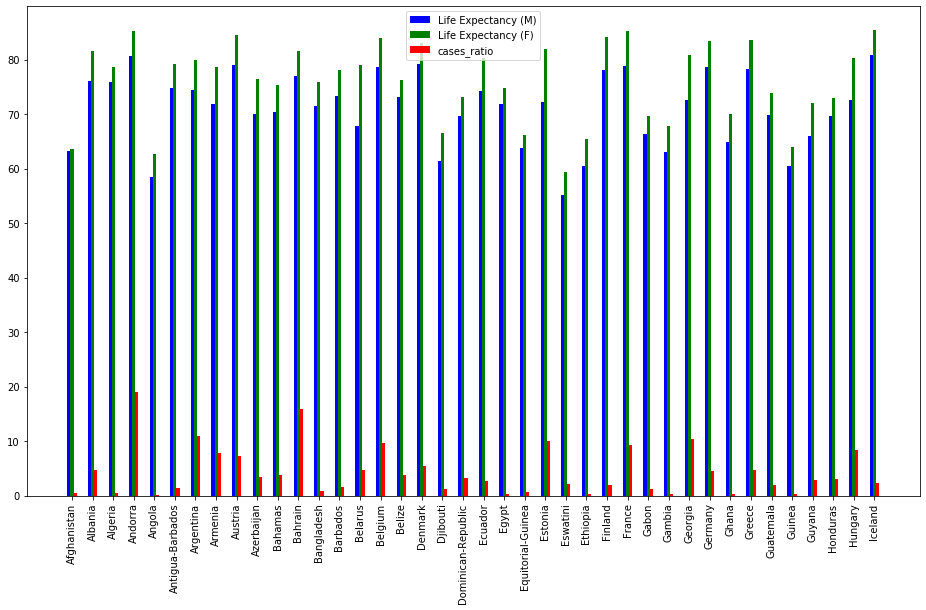

In [110]:
import numpy as np
import matplotlib.pyplot as plt

X = df_socio_eco['Country'].head(40)
fig = plt.subplots(figsize =(16, 9))

br1 = np.arange(40)
br2 = [x + 0.15 for x in br1]
br3 = [x + 0.15 for x in br2]

plt.xticks([r + 0.15 for r in range(40)],df_socio_eco['Country'].head(40).tolist(),rotation=90)
plt.bar(br1 ,df_socio_eco['Life Expectancy (M)'].head(40), color = 'b', width =0.15, label ='Life Expectancy (M)')
plt.bar(br2 ,df_socio_eco['Life Expectancy (F)'].head(40), color = 'g', width = 0.15, label ='Life Expectancy (F)')
plt.bar(br3 ,df_socio_eco['cases_ratio'].head(40), color = 'r', width = 0.15, label ='cases_ratio')
plt.legend()
plt.show()

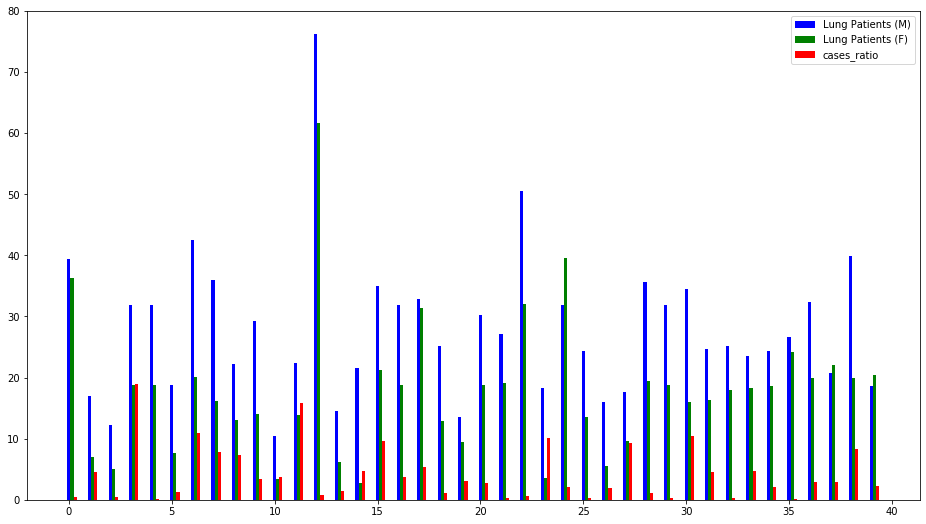

In [111]:
Y = df_socio_eco['Country'].head(40)
fig = plt.subplots(figsize =(16, 9))

br1 = np.arange(40)
br2 = [x + 0.15 for x in br1]
br3 = [x + 0.15 for x in br2]

plt.bar(br1 ,df_socio_eco['Lung Patients (M)'].head(40), color = 'b', width =0.15, label ='Lung Patients (M)')
plt.bar(br2 ,df_socio_eco['Lung Patients (F)'].head(40), color = 'g', width = 0.15, label ='Lung Patients (F)')
plt.bar(br3 ,df_socio_eco['cases_ratio'].head(40), color = 'r', width = 0.15, label ='cases_ratio')
plt.legend()
plt.show()

## line graph between median age and ratio of total cases in each country

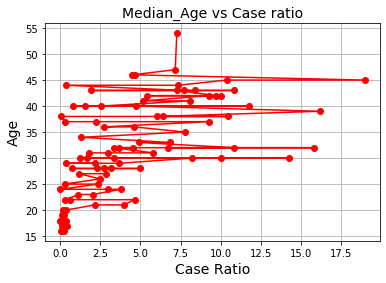

In [112]:
median_age_pop_data = df_socio_eco.sort_values(['Median_Age'], ascending = (True))
plt.plot(median_age_pop_data['cases_ratio'],  [round(num) for num in median_age_pop_data['Median_Age']], color='red', marker='o')
plt.title('Median_Age vs Case ratio', fontsize=14)
plt.xlabel('Case Ratio', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True)
plt.show()

## line graph between sex ratio and ratio of total cases in each country

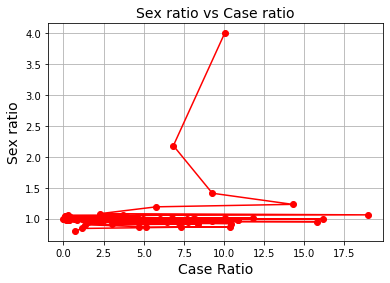

In [113]:
sex_pop_data = df_socio_eco.sort_values(['Sex Ratio'], ascending = (True))

plt.plot(sex_pop_data['cases_ratio'],  (sex_pop_data['Sex Ratio']), color='red', marker='o')
plt.title('Sex ratio vs Case ratio', fontsize=14)
plt.xlabel('Case Ratio', fontsize=14)
plt.ylabel('Sex ratio', fontsize=14)
plt.grid(True)
plt.show()

## line graph between Age above 65 year and ratio of total cases in each country

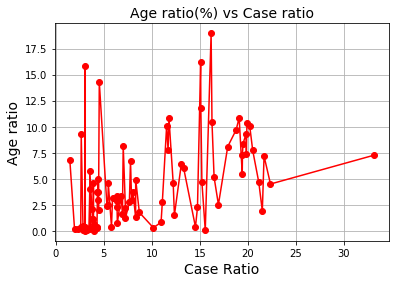

In [114]:
age_pop_data = df_socio_eco.sort_values(['Age%_65+'], ascending = (True))
plt.plot(age_pop_data['Age%_65+'],  (age_pop_data['cases_ratio']), color='red', marker='o')
plt.title('Age ratio(%) vs Case ratio', fontsize=14)
plt.xlabel('Case Ratio', fontsize=14)
plt.ylabel('Age ratio', fontsize=14)
plt.grid(True)
plt.show()

## Scatter plotting between lung patient(M/F) and ratio of total cases in each country

Text(0, 0.5, 'Total patients(M/F)')

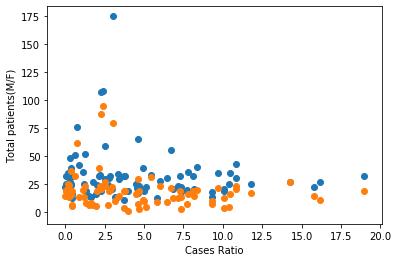

In [115]:

plt.scatter(df_socio_eco['cases_ratio'], df_socio_eco['Lung Patients (M)'], c= '#1f77b4')#blue represent male
plt.scatter(df_socio_eco['cases_ratio'], df_socio_eco['Lung Patients (F)'], c= '#ff7f0e')#orange represent female
plt.xlabel('Cases Ratio')
plt.ylabel('Total patients(M/F)')

## Scatter plotting between Life expectancy(M/F) and ratio of total cases in each country

Text(0, 0.5, 'Life expectancy(M/F)')

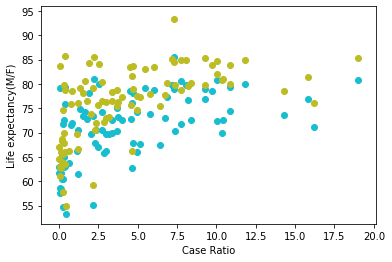

In [116]:
plt.scatter(df_socio_eco['cases_ratio'], df_socio_eco['Life Expectancy (M)'], c= '#17becf')#cray represent male
plt.scatter(df_socio_eco['cases_ratio'], df_socio_eco['Life Expectancy (F)'], c= '#bcbd22')#yellow represent female
plt.xlabel('Case Ratio')
plt.ylabel('Life expectancy(M/F)')

## Heat map of socio-eco features and total cases in each country

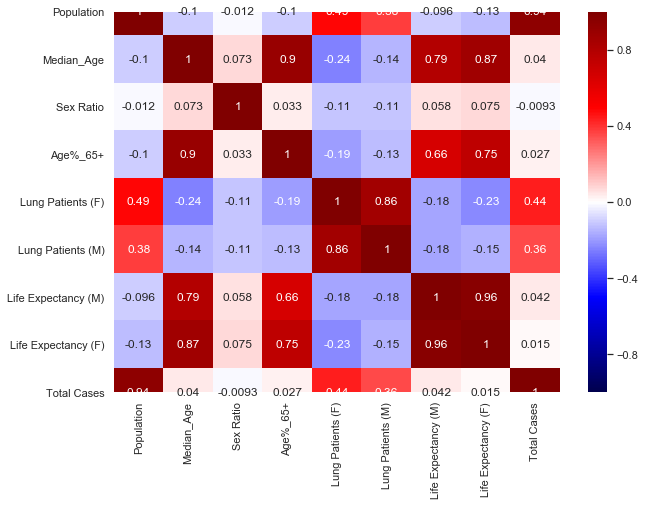

In [117]:
df_socio_eco_corr = df_socio_eco.drop(['cases_ratio'], axis = 1)
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df_socio_eco_corr.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [118]:
df_socio_eco_corr.corr().sort_values(['Total Cases'], ascending = (True))

,Population,Median_Age,Sex Ratio,Age%_65+,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total Cases
Sex Ratio,-0.011743,0.072615,1.000000,0.033240,-0.114669,-0.110433,0.058482,0.075436,-0.009264
Life Expectancy (F),-0.130541,0.873995,0.075436,0.750778,-0.227047,-0.148535,0.962419,1.000000,0.014775
Age%_65+,-0.101009,0.903392,0.033240,1.000000,-0.194728,-0.127324,0.661197,0.750778,0.026643
Median_Age,-0.099547,1.000000,0.072615,0.903392,-0.243662,-0.142643,0.794496,0.873995,0.040044
Life Expectancy (M),-0.096301,0.794496,0.058482,0.661197,-0.175264,-0.175754,1.000000,0.962419,0.041933
Lung Patients (M),0.379089,-0.142643,-0.110433,-0.127324,0.862967,1.000000,-0.175754,-0.148535,0.358871
Lung Patients (F),0.488732,-0.243662,-0.114669,-0.194728,1.000000,0.862967,-0.175264,-0.227047,0.440292
Population,1.000000,-0.099547,-0.011743,-0.101009,0.488732,0.379089,-0.096301,-0.130541,0.939469
Total Cases,0.939469,0.040044,-0.009264,0.026643,0.440292,0.358871,0.041933,0.014775,1.000000
